# Pathrise Data Aanlysis
### Chengyu Si    7/9/2020

## Introduction
Pathrise is an online program that provides 1-on-1 mentorship, training, and advice to help job seekers get the best possible jobs in tech. Every two weeks, Pathrise welcomes a new cohort of fellows. If a candidate is interested in joining our program and successfully passes all stages of our admission process, they receive an offer to join Pathrise and become a fellow. After free trial, a fellow needs to sign an ISA (Income Share Agreement) with us if they want to stay in the program. On average, for fellows who stay with us after their free trial period, it takes about 4 months to receive a final job offer. However, there is a lot of variation in fellows’ outcomes. 

The objective of this project is to analyzing the performance of fellows and improving profit by optimizing admission and training process. The project is organized as follows: the first part is data inspection and cleaning; the second part is classification of placement status using different machine learning models; the third part is regression of duration days and the final part is the conclusion and suggestions. 

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [178]:
df = pd.read_excel("data_Pathrise.xlsx")

In [179]:
df

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,2540,Withdrawn (Failed),Design,JUN18A,457.0,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15,Male,Non-Hispanic White or Euro-American
2540,2541,Withdrawn (Failed),Data,JAN19B,488.0,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American
2541,2542,Active,SWE,SEP18C,NaN,0,Contractor,Bachelor's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,1.0,30,Female,Non-Hispanic White or Euro-American
2542,2543,Active,SWE,MAY18A,NaN,0,NaN,Master's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,2.0,10,Male,Decline to Self Identify


In [180]:
df.info

<bound method DataFrame.info of         id     pathrise_status primary_track cohort_tag  \
0        1              Active           SWE     OCT19A   
1        2              Active           PSO     JAN20A   
2        3         Closed Lost        Design     AUG19B   
3        4         Closed Lost           PSO     AUG19B   
4        5              Placed           SWE     AUG19A   
...    ...                 ...           ...        ...   
2539  2540  Withdrawn (Failed)        Design     JUN18A   
2540  2541  Withdrawn (Failed)          Data     JAN19B   
2541  2542              Active           SWE     SEP18C   
2542  2543              Active           SWE     MAY18A   
2543  2544           Withdrawn           SWE     OCT19A   

      program_duration_days  placed  employment_status   \
0                       NaN       0          Unemployed   
1                       NaN       0          Unemployed   
2                       0.0       0  Employed Part-Time   
3                      

## Data Inspection
The key variables in this dataset are placement status and duration days. The average program duration is 132.7 days, while the placed rate is about 50.7%. We also have other personal features like level of education, year of experience and work authorization status, etc. Then I inpected Pathrise status from different aspects using plots. I found that the placement rates of fellows who have bachelor's degree or higher is larger than those who don't have degree. However, the withdraw rate of bachelor-degree fellows is higher than others. The placement rate of PSO track fellows is lower than other tracks like design, SWE and Data.

In [181]:
df.dropna(inplace = True)
df.describe()

,id,program_duration_days,placed,number_of_interviews,number_of_applications
count,988.000000,988.000000,988.000000,988.000000,988.000000
mean,1110.110324,132.705466,0.507085,2.256073,38.044534
std,736.628258,125.864586,0.500203,3.042125,48.302492
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,468.500000,14.000000,0.000000,0.000000,9.000000
50%,993.000000,107.000000,1.000000,1.000000,25.000000
75%,1741.500000,220.250000,1.000000,4.000000,50.000000
max,2544.000000,548.000000,1.000000,20.000000,500.000000


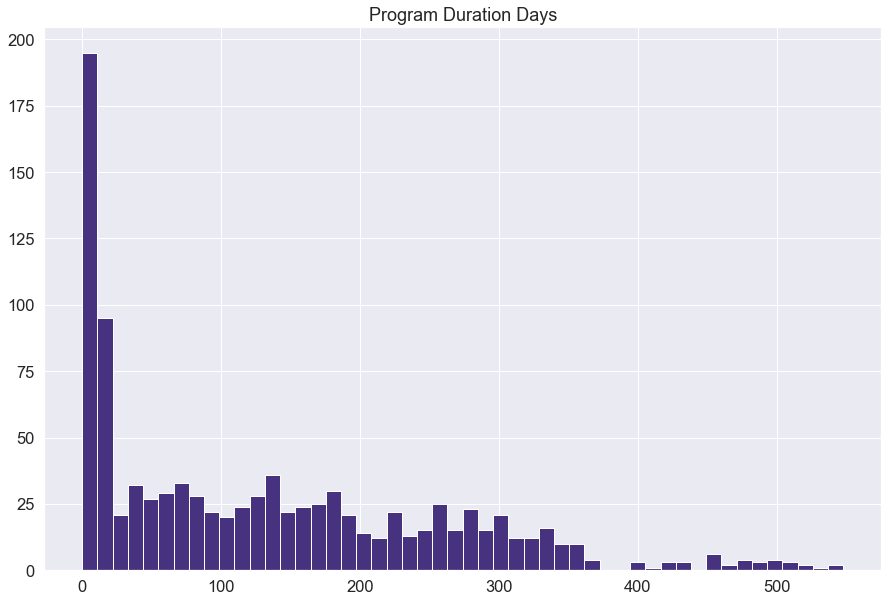

In [182]:
df.program_duration_days.hist(bins=50, figsize=(15,10))
plt.title("Program Duration Days")
plt.show()

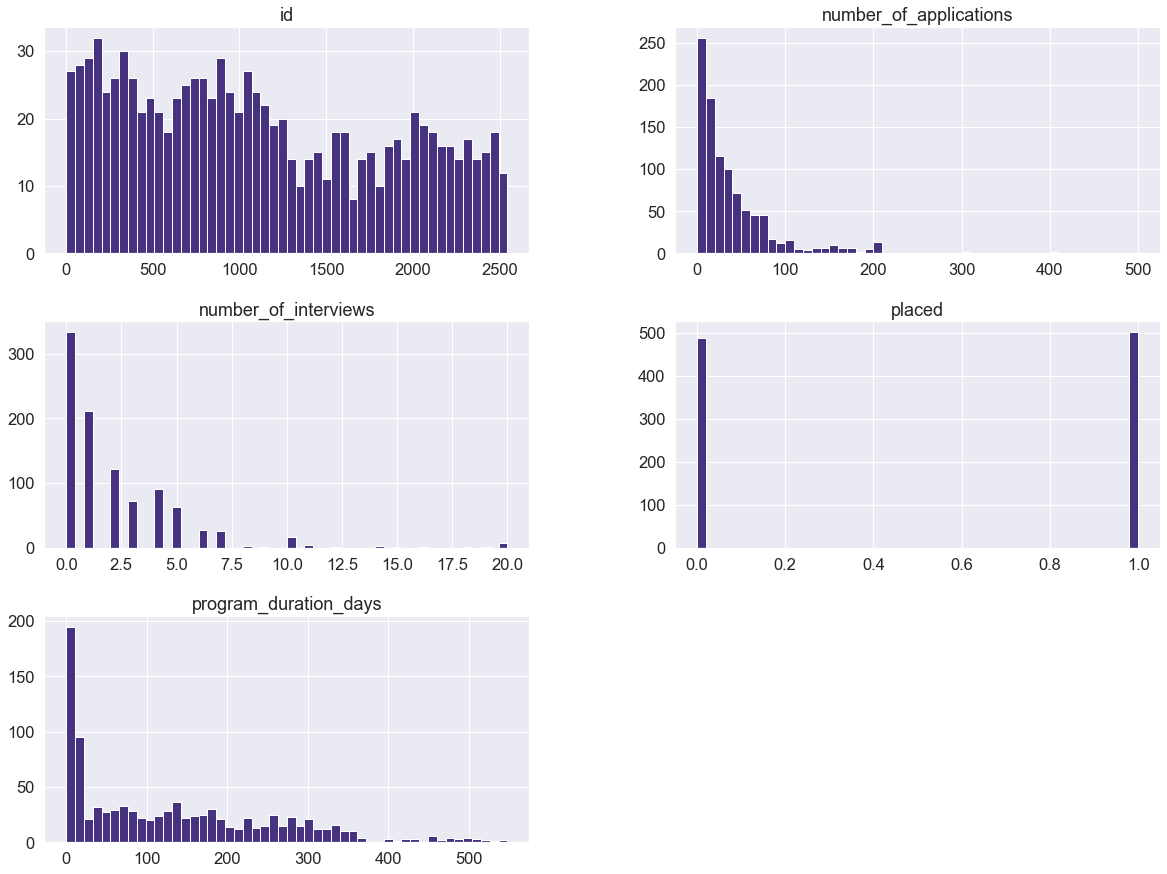

In [183]:
df.hist(bins=50, figsize=(20,15))
plt.show()

No handles with labels found to put in legend.


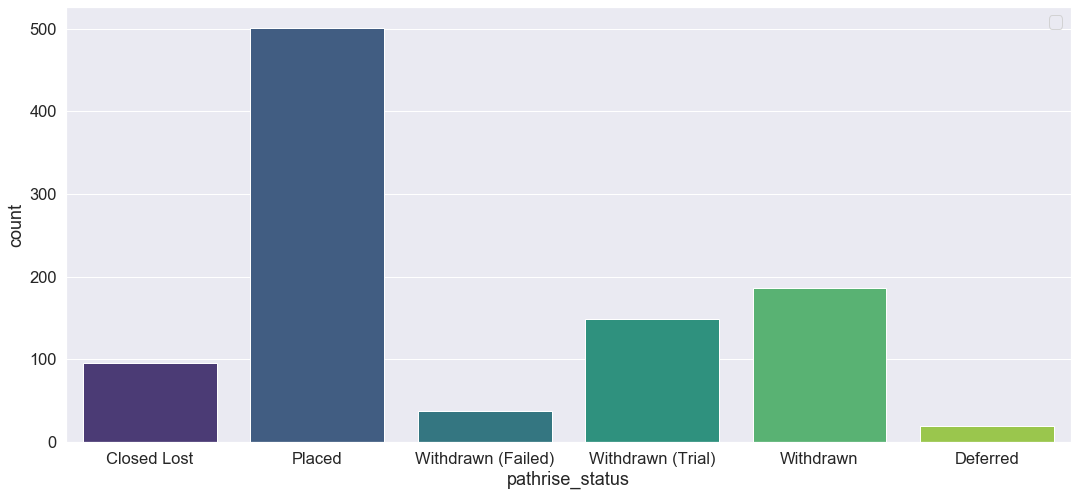

In [184]:
plt.figure(figsize=(18,8))
sns.set(font_scale=1.5, palette= "viridis")
sns.countplot(data = df, x = "pathrise_status")
plt.legend(loc = 1)
plt.show()

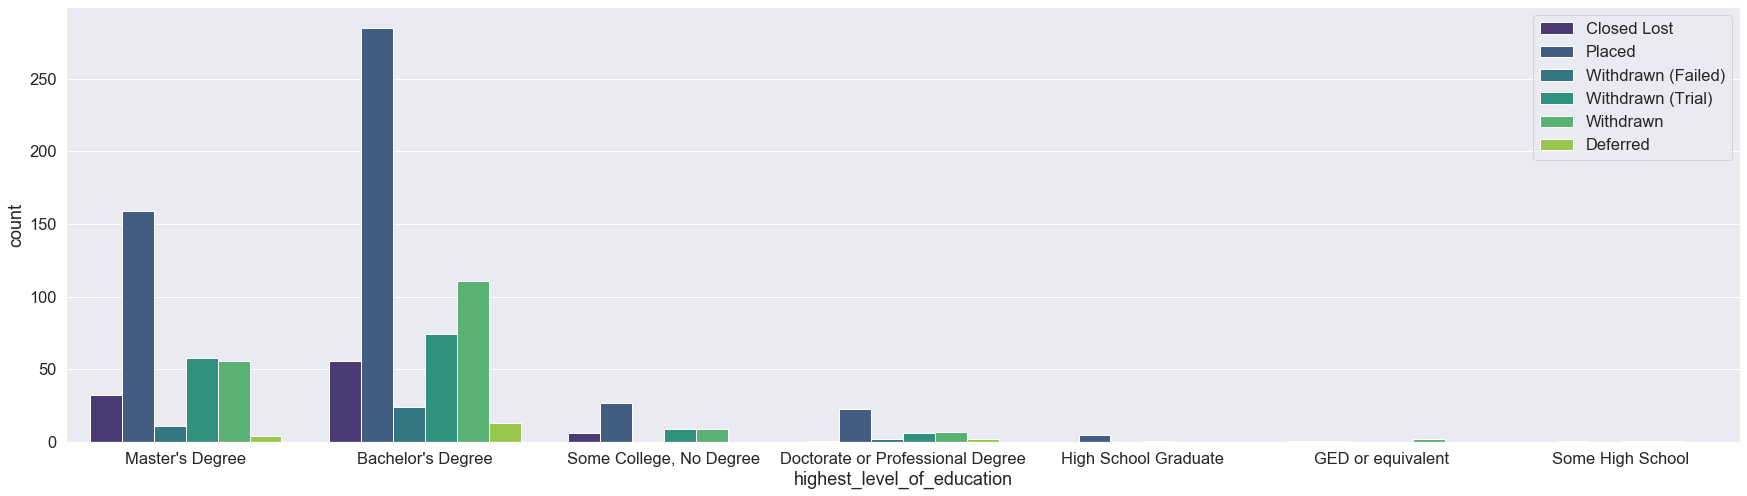

In [193]:
plt.figure(figsize=(30,8))
sns.set(font_scale=1.5, palette= "viridis")
sns.countplot(data = df, x = "highest_level_of_education",hue = "pathrise_status")
plt.legend(loc = 1)
plt.show()

No handles with labels found to put in legend.


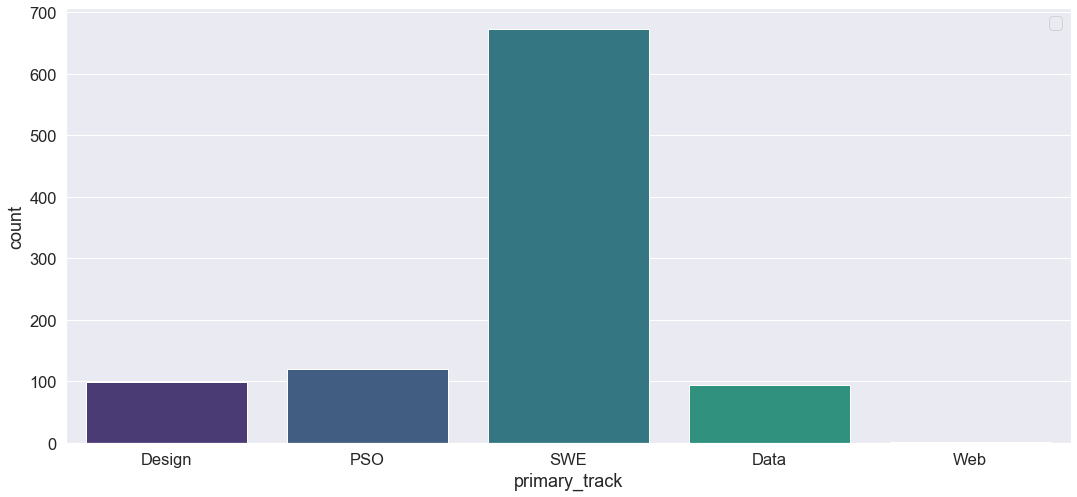

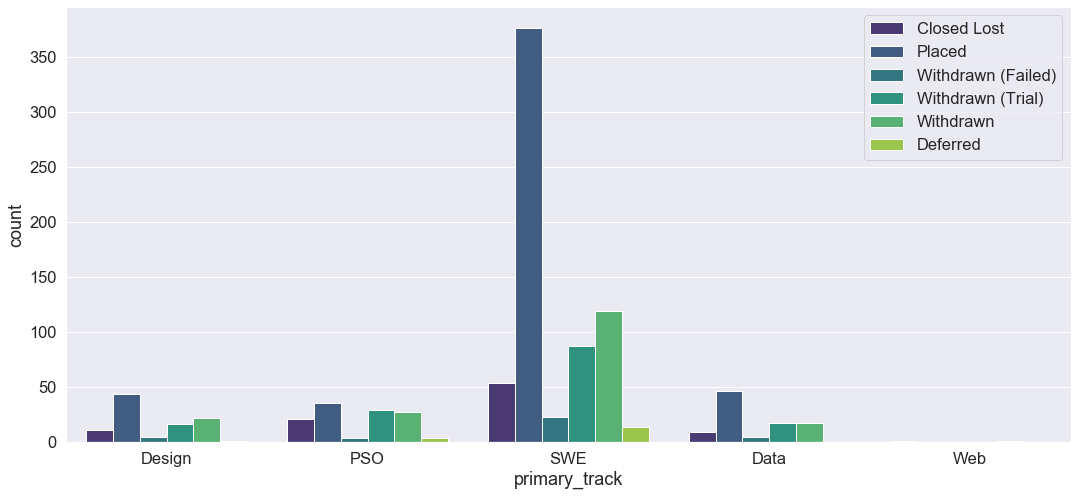

In [189]:
plt.figure(figsize=(18,8))
sns.set(font_scale=1.5, palette= "viridis")
sns.countplot(data = df, x = "primary_track",hue = "pathrise_status")
plt.legend(loc = 1)
plt.show()

No handles with labels found to put in legend.


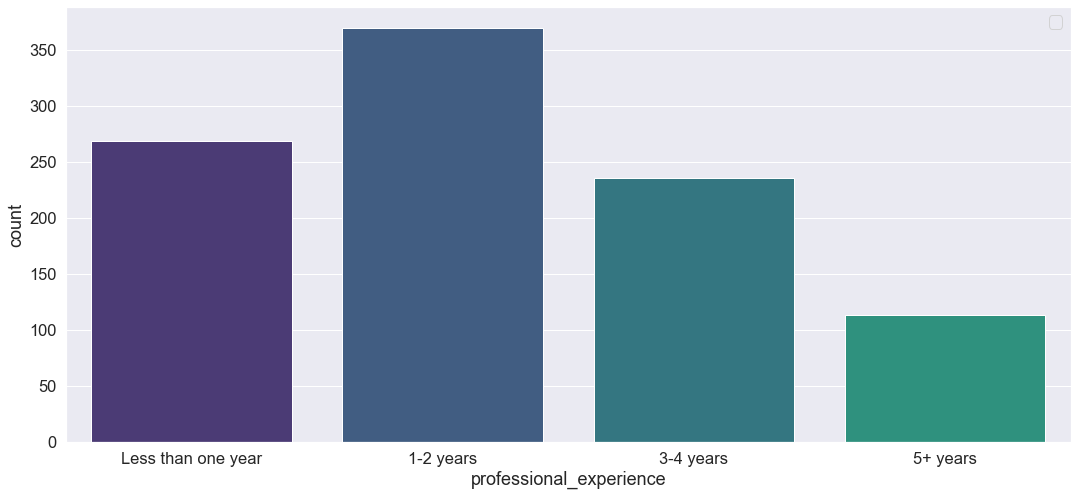

In [114]:
plt.figure(figsize=(18,8))
sns.set(font_scale=1.5, palette= "viridis")
sns.countplot(data = df, x = "professional_experience")
plt.legend(loc = 1)
plt.show()

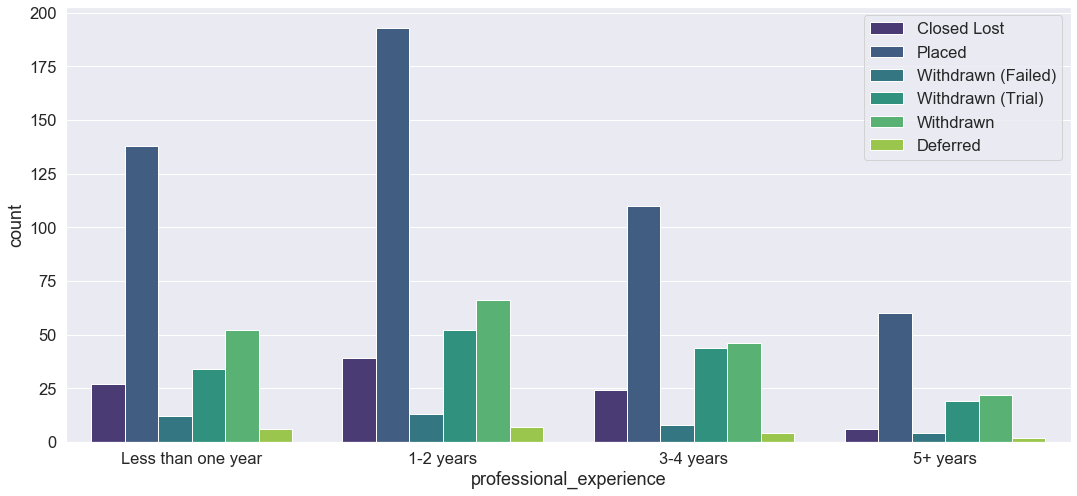

In [190]:
plt.figure(figsize=(18,8))
sns.set(font_scale=1.5, palette= "viridis")
sns.countplot(data = df, x = "professional_experience",hue = "pathrise_status")
plt.legend(loc = 1)
plt.show()

No handles with labels found to put in legend.


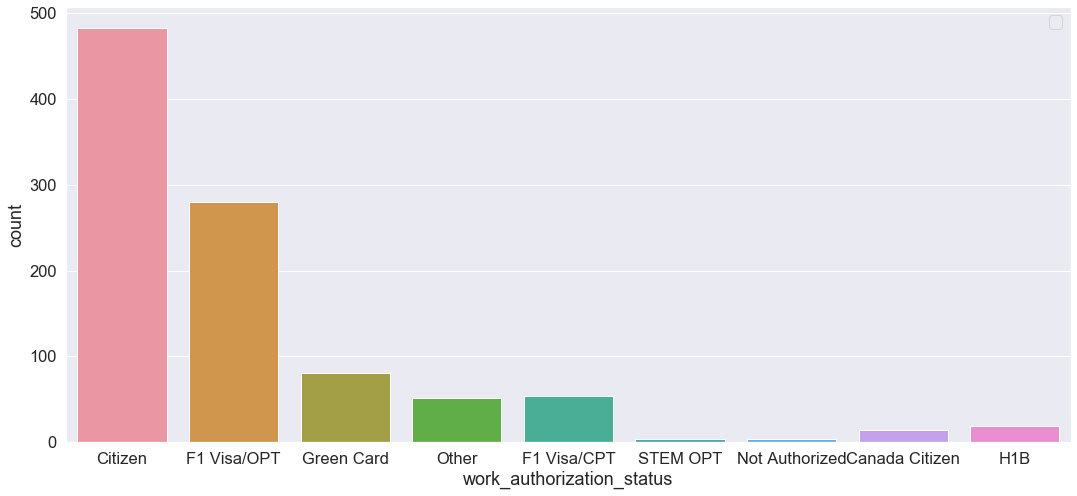

In [116]:
plt.figure(figsize=(18,8))
sns.set(font_scale=1.5, palette= "viridis")
sns.countplot(data = df, x = "work_authorization_status")
plt.legend(loc = 1)
plt.show()

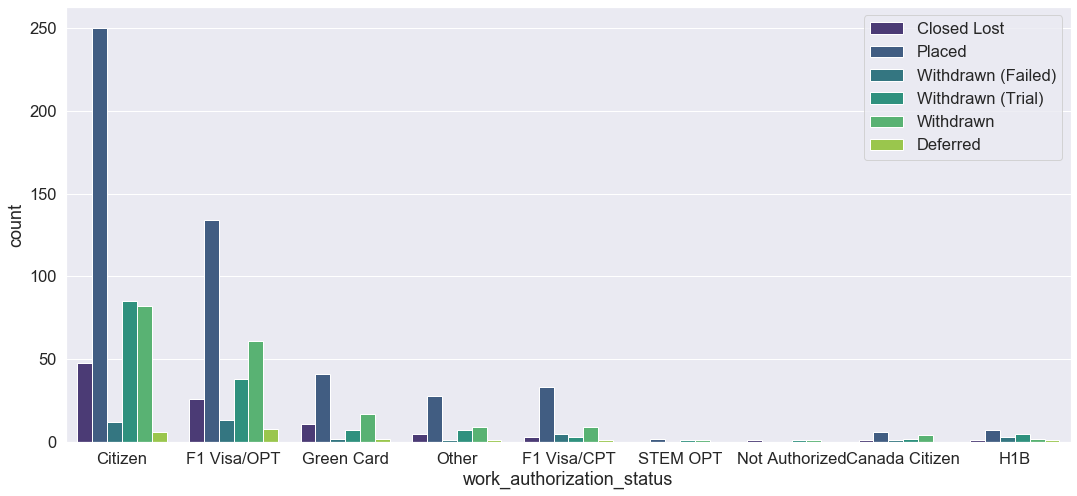

In [191]:
plt.figure(figsize=(18,8))
sns.set(font_scale=1.5, palette= "viridis")
sns.countplot(data = df, x = "work_authorization_status",hue = "pathrise_status")
plt.legend(loc = 1)
plt.show()

# Classification of Placement
In this part I applied different machine learning models to classify the placement using personal features. Those machine learning models are logistic regression, K-nn, random forest and support vector machine. Compare the accuracy score of each model, we can find that logistic regression provides the best classification performance, where the accuracy is 0.581

In [321]:
label=df.placed.copy()
label

2       0
3       0
4       1
5       0
6       0
       ..
2524    0
2534    1
2538    0
2539    0
2543    0
Name: placed, Length: 988, dtype: int64

In [322]:
features_placed_st=df.drop(columns=["id","pathrise_status","cohort_tag","program_duration_days","placed","number_of_interviews", "number_of_applications"])
features_placed_st

,primary_track,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,gender,race
2,Design,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,Male,East Asian or Asian American
3,PSO,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,Male,Decline to Self Identify
4,SWE,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,Male,East Asian or Asian American
5,SWE,Employed Full-Time,Master's Degree,1-2 months,Technical interviewing,3-4 years,Green Card,Male,East Asian or Asian American
6,SWE,Employed Full-Time,Master's Degree,Less than one month,Getting past phone screens,3-4 years,Green Card,Male,"Black, Afro-Caribbean, or African American"
...,...,...,...,...,...,...,...,...,...
2524,PSO,Unemployed,Bachelor's Degree,Less than one month,Hearing back on my applications,3-4 years,Citizen,Male,Non-Hispanic White or Euro-American
2534,SWE,Employed Full-Time,Bachelor's Degree,1-2 months,Getting past phone screens,1-2 years,Citizen,Male,South Asian or Indian American
2538,SWE,Employed Part-Time,Master's Degree,Less than one month,Lack of relevant experience,5+ years,Other,Decline to Self Identify,Middle Eastern or Arab American
2539,Design,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,Male,Non-Hispanic White or Euro-American


In [323]:
features_placed=pd.get_dummies(features_placed_st)

In [324]:
features_placed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 2 to 2543
Data columns (total 57 columns):
 #   Column                                                            Non-Null Count  Dtype
---  ------                                                            --------------  -----
 0   primary_track_Data                                                988 non-null    uint8
 1   primary_track_Design                                              988 non-null    uint8
 2   primary_track_PSO                                                 988 non-null    uint8
 3   primary_track_SWE                                                 988 non-null    uint8
 4   primary_track_Web                                                 988 non-null    uint8
 5   employment_status _Contractor                                     988 non-null    uint8
 6   employment_status _Employed Full-Time                             988 non-null    uint8
 7   employment_status _Employed Part-Time               

## splitting into test and train

In [325]:
test_size = 0.2
X_test = features_placed.sample(frac = test_size, random_state= 123)
X_test

,primary_track_Data,primary_track_Design,primary_track_PSO,primary_track_SWE,primary_track_Web,employment_status _Contractor,employment_status _Employed Full-Time,employment_status _Employed Part-Time,employment_status _Student,employment_status _Unemployed,...,gender_Male,gender_Non-Binary,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
1095,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2273,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1634,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2155,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
335,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
532,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1250,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
864,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [326]:
X_train = features_placed.loc[~features_placed.index.isin(X_test.index)].copy()
X_train

,primary_track_Data,primary_track_Design,primary_track_PSO,primary_track_SWE,primary_track_Web,employment_status _Contractor,employment_status _Employed Full-Time,employment_status _Employed Part-Time,employment_status _Student,employment_status _Unemployed,...,gender_Male,gender_Non-Binary,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
2,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
5,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
9,0,0,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2518,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2521,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2534,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2539,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [327]:
y_train = label.loc[X_train.index]
y_test = label.loc[X_test.index]
y_train

2       0
3       0
4       1
5       0
9       0
       ..
2518    1
2521    0
2534    1
2539    0
2543    0
Name: placed, Length: 790, dtype: int64

## Logistic regression

In [328]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import sklearn.linear_model as lm


In [329]:
logreg = lm.LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [330]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.58


In [331]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[51 41]
 [42 64]]


In [332]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5808080808080808

In [335]:
# import statsmodels.api as sm
# logit_mod = sm.Logit(y_train, X_train)
# logit_res = logit_mod.fit()
# print(logit_res.summary())

## K-NN

In [218]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [219]:
y_pred = classifier.predict(X_test)

In [220]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[40 52]
 [38 68]]
              precision    recall  f1-score   support

           0       0.51      0.43      0.47        92
           1       0.57      0.64      0.60       106

    accuracy                           0.55       198
   macro avg       0.54      0.54      0.54       198
weighted avg       0.54      0.55      0.54       198



In [221]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5454545454545454

## Random Forest Classifier

In [222]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, 

                               bootstrap = True,

                               max_features = 'sqrt')

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [223]:
rf_predictions = rf.predict(X_test)

rf_probs = rf.predict_proba(X_test)[:, 1]

In [224]:
from sklearn.metrics import roc_auc_score
roc_value = roc_auc_score(y_test, rf_probs)

In [225]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5454545454545454

In [226]:
# Extract feature importances
feature_imp = pd.Series(data = rf.feature_importances_,
                        index = X_train.columns).sort_values(ascending = False)
feature_imp

employment_status _Student                                          0.036547
biggest_challenge_in_search_Hearing back on my applications         0.036163
professional_experience_1-2 years                                   0.034084
race_East Asian or Asian American                                   0.033267
highest_level_of_education_Master's Degree                          0.032266
highest_level_of_education_Bachelor's Degree                        0.032001
length_of_job_search_1-2 months                                     0.031634
professional_experience_Less than one year                          0.031116
work_authorization_status_Citizen                                   0.031056
race_South Asian or Indian American                                 0.029299
employment_status _Employed Full-Time                               0.028513
employment_status _Unemployed                                       0.027985
length_of_job_search_Less than one month                            0.027693

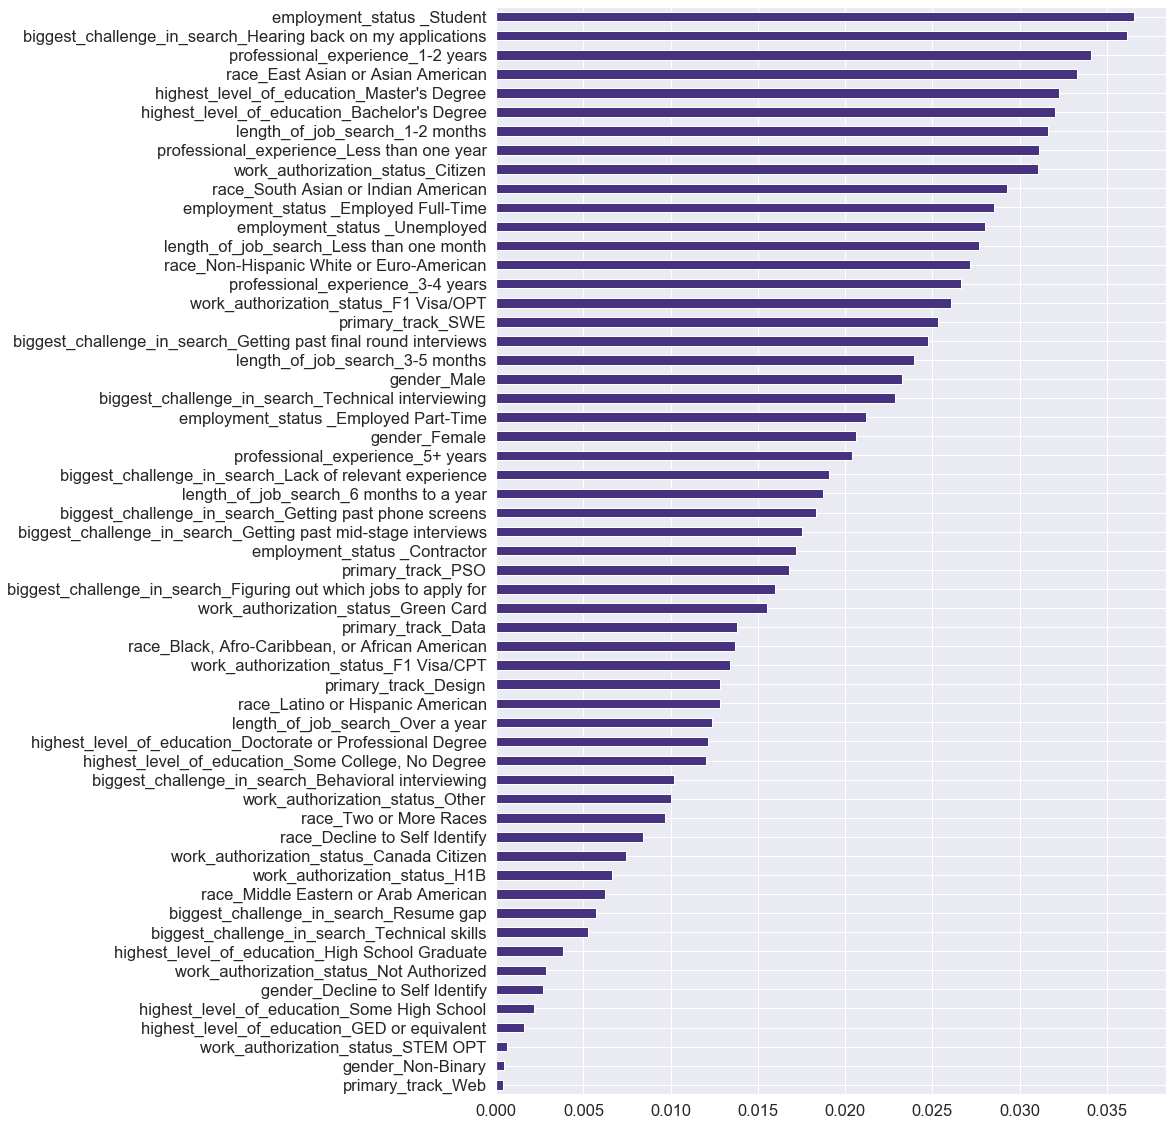

In [227]:
feature_imp.sort_values().plot.barh(figsize = (12,20))
plt.show()

## SVM

In [228]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
svclassifier.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [229]:
y_pred = svclassifier.predict(X_test)

In [230]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[41 51]
 [34 72]]
              precision    recall  f1-score   support

           0       0.55      0.45      0.49        92
           1       0.59      0.68      0.63       106

    accuracy                           0.57       198
   macro avg       0.57      0.56      0.56       198
weighted avg       0.57      0.57      0.56       198



In [231]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5707070707070707

# Regression of duration days 
To predict the duration days of placed fellows, I run the linear regression and random forest regression on the data of placed fellows. The RMSE of linear regression is smaller than RF regression, but R-square is not good. The result of RF regression shows that number of applications is the most important feature that affects duration days.

In [286]:
df_placed= df[df['placed']==1]

In [287]:
df_placed

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American
23,24,Placed,PSO,NOV19B,193.0,1,Unemployed,Master's Degree,6 months to a year,Hearing back on my applications,1-2 years,Citizen,5.0,4,Male,Non-Hispanic White or Euro-American
30,31,Placed,SWE,NOV19A,73.0,1,Student,Master's Degree,Less than one month,Figuring out which jobs to apply for,1-2 years,F1 Visa/CPT,0.0,1,Male,East Asian or Asian American
54,55,Placed,SWE,AUG19A,76.0,1,Student,Master's Degree,Less than one month,Getting past final round interviews,3-4 years,F1 Visa/OPT,0.0,30,Female,East Asian or Asian American
63,64,Placed,SWE,SEP18C,65.0,1,Unemployed,Bachelor's Degree,1-2 months,Getting past phone screens,1-2 years,F1 Visa/OPT,0.0,0,Female,"Black, Afro-Caribbean, or African American"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,2493,Placed,SWE,FEB20A,344.0,1,Student,Master's Degree,1-2 months,Getting past mid-stage interviews,1-2 years,F1 Visa/OPT,1.0,1,Female,Non-Hispanic White or Euro-American
2506,2507,Placed,SWE,DEC18A,78.0,1,Student,Master's Degree,Less than one month,Hearing back on my applications,Less than one year,Citizen,5.0,200,Female,South Asian or Indian American
2517,2518,Placed,PSO,DEC18A,16.0,1,Student,"Some College, No Degree",Less than one month,Figuring out which jobs to apply for,1-2 years,F1 Visa/OPT,4.0,6,Female,East Asian or Asian American
2518,2519,Placed,SWE,FEB19B,306.0,1,Student,Master's Degree,3-5 months,Hearing back on my applications,Less than one year,Canada Citizen,0.0,130,Male,South Asian or Indian American


In [288]:
df_placed.describe()

,id,program_duration_days,placed,number_of_interviews,number_of_applications
count,501.000000,501.000000,501.0,501.000000,501.000000
mean,1055.341317,161.005988,1.0,2.323353,38.063872
std,738.839358,104.157544,0.0,3.125257,47.379742
min,5.000000,1.000000,1.0,0.000000,0.000000
25%,369.000000,74.000000,1.0,0.000000,9.000000
50%,874.000000,142.000000,1.0,1.000000,25.000000
75%,1716.000000,237.000000,1.0,4.000000,50.000000
max,2535.000000,548.000000,1.0,20.000000,400.000000


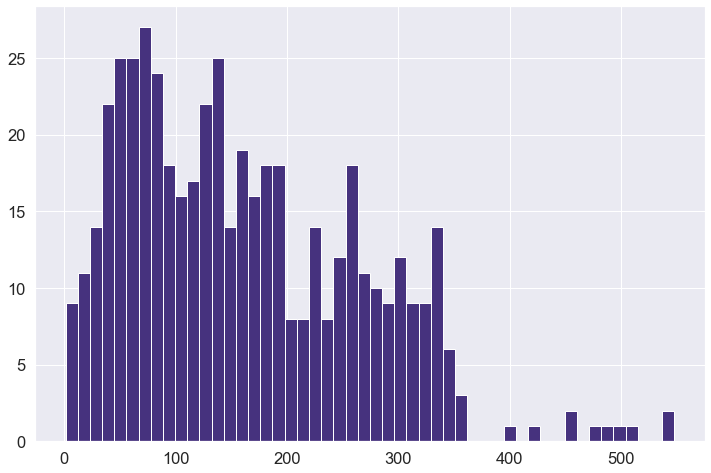

In [289]:
df_placed.program_duration_days.hist(bins = 50, figsize = (12, 8))
plt.show()

In [290]:
days=df_placed.program_duration_days.copy()
days

4        89.0
23      193.0
30       73.0
54       76.0
63       65.0
        ...  
2492    344.0
2506     78.0
2517     16.0
2518    306.0
2534    119.0
Name: program_duration_days, Length: 501, dtype: float64

In [291]:
features_days_st=df_placed.drop(columns=["id","pathrise_status","cohort_tag","program_duration_days","placed","number_of_interviews", "number_of_applications"])
features_days_st

,primary_track,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,gender,race
4,SWE,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,Male,East Asian or Asian American
23,PSO,Unemployed,Master's Degree,6 months to a year,Hearing back on my applications,1-2 years,Citizen,Male,Non-Hispanic White or Euro-American
30,SWE,Student,Master's Degree,Less than one month,Figuring out which jobs to apply for,1-2 years,F1 Visa/CPT,Male,East Asian or Asian American
54,SWE,Student,Master's Degree,Less than one month,Getting past final round interviews,3-4 years,F1 Visa/OPT,Female,East Asian or Asian American
63,SWE,Unemployed,Bachelor's Degree,1-2 months,Getting past phone screens,1-2 years,F1 Visa/OPT,Female,"Black, Afro-Caribbean, or African American"
...,...,...,...,...,...,...,...,...,...
2492,SWE,Student,Master's Degree,1-2 months,Getting past mid-stage interviews,1-2 years,F1 Visa/OPT,Female,Non-Hispanic White or Euro-American
2506,SWE,Student,Master's Degree,Less than one month,Hearing back on my applications,Less than one year,Citizen,Female,South Asian or Indian American
2517,PSO,Student,"Some College, No Degree",Less than one month,Figuring out which jobs to apply for,1-2 years,F1 Visa/OPT,Female,East Asian or Asian American
2518,SWE,Student,Master's Degree,3-5 months,Hearing back on my applications,Less than one year,Canada Citizen,Male,South Asian or Indian American


In [292]:
features_1=pd.get_dummies(features_days_st)

In [293]:
features_days=pd.concat([features_1, df_placed.number_of_interviews, df_placed.number_of_applications], axis = 1)
features_days

,primary_track_Data,primary_track_Design,primary_track_PSO,primary_track_SWE,employment_status _Contractor,employment_status _Employed Full-Time,employment_status _Employed Part-Time,employment_status _Student,employment_status _Unemployed,highest_level_of_education_Bachelor's Degree,...,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races,number_of_interviews,number_of_applications
4,0,0,0,1,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,10.0,100
23,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,5.0,4
30,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0.0,1
54,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0.0,30
63,0,0,0,1,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1.0,1
2506,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,5.0,200
2517,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,4.0,6
2518,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0.0,130


In [294]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features_days,days,test_size=0.2)

In [295]:
X_train

,primary_track_Data,primary_track_Design,primary_track_PSO,primary_track_SWE,employment_status _Contractor,employment_status _Employed Full-Time,employment_status _Employed Part-Time,employment_status _Student,employment_status _Unemployed,highest_level_of_education_Bachelor's Degree,...,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races,number_of_interviews,number_of_applications
767,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1.0,30
2273,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0.0,30
1835,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1.0,20
762,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,4.0,40
1608,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,1.0,4
387,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1.0,15
724,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,2.0,60
2039,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,3.0,30


In [296]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state = 12, n_estimators = 50,
                                   max_features= "sqrt", max_depth= 25, min_samples_split=2)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=12, verbose=0, warm_start=False)

In [297]:
forest_reg.score(X_train, y_train)

0.8407693335628417

In [298]:
from sklearn.metrics import mean_squared_error

In [299]:
pred = forest_reg.predict(X_train)
pred

array([309.8   , 274.22  , 220.36  ,  85.56  , 217.5   , 113.32  ,
        56.42  , 267.64  , 123.38  , 115.2675, 172.6   , 205.44  ,
       229.94  , 181.12  , 267.74  , 191.62  , 216.9   ,  52.34  ,
       167.78  , 283.66  , 260.32  , 188.24  , 250.    ,  64.6   ,
       190.72  , 123.76  , 283.68  ,  87.08  , 281.04  ,  84.62  ,
       168.86  , 140.18  ,  54.1   , 253.54  , 150.96  ,  66.22  ,
       114.6475, 116.78  ,  87.54  , 144.08  , 259.42  , 139.08  ,
       236.4   , 160.36  , 155.16  , 141.38  ,  76.48  , 242.66  ,
       280.36  , 132.1   , 151.7   , 244.22  , 131.    , 219.82  ,
       110.28  , 100.08  , 197.64  , 267.32  , 225.74  , 244.16  ,
       118.08  , 212.68  ,  94.8   , 319.06  ,  62.28  , 106.    ,
       222.52  , 179.12  , 132.4   , 218.42  , 142.24  ,  84.1   ,
        65.76  , 105.94  , 175.58  , 244.54  , 294.36  ,  99.7   ,
       130.28  , 184.18  ,  63.98  ,  97.02  ,  88.32  , 126.04  ,
       214.7   ,  92.8   , 135.28  , 105.36  ,  96.38  , 214.3

In [300]:
forest_mse = mean_squared_error(y_train, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

41.492313644743284

###Evaluating the Model on the Test Set


In [247]:
forest_reg.score(X_test, y_test)

-0.08780745937225154

In [248]:
pred = forest_reg.predict(X_test)
pred

array([124.7       , 185.9       , 110.64      , 137.58      ,
       185.52      , 180.52      , 147.62      , 140.64      ,
       151.34      , 151.12      , 143.64      , 186.26      ,
       184.82      , 141.66      , 133.62      , 169.26      ,
       181.82      , 150.62      , 145.28      , 177.66      ,
       171.76      , 210.525     , 156.62      , 169.18      ,
       171.64      , 148.04      , 217.78      , 194.1       ,
       213.22      , 151.7       , 151.18      , 153.51333333,
       172.22      , 172.06      , 101.92      , 174.62      ,
       135.84      , 185.42      , 194.42      , 157.86      ,
       141.64      , 158.6       , 152.4       , 183.22      ,
       160.44      , 161.74      , 193.4       , 195.68      ,
       172.84      , 102.8       , 190.42      , 151.36      ,
       199.26      , 163.5       , 117.48      , 157.34      ,
       117.04      , 159.54      , 130.4       , 158.72      ,
       167.38      , 200.18      , 148.54      , 145.58

In [249]:
forest_mse = mean_squared_error(y_test, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

113.05649908274175

In [250]:
comp = pd.DataFrame(data = {"True_V": y_test, "Pred":pred})
comp

,True_V,Pred
1171,212.0,124.70
1835,255.0,185.90
689,80.0,110.64
738,77.0,137.58
320,24.0,185.52
...,...,...
696,272.0,107.84
367,86.0,126.42
1858,131.0,145.98
1822,176.0,213.74


In [251]:
ae = comp.True_V.sub(comp.Pred).abs()
ae

1171     87.30
1835     69.10
689      30.64
738      60.58
320     161.52
         ...  
696     164.16
367      40.42
1858     14.98
1822     37.74
1015     38.12
Length: 101, dtype: float64

In [252]:
mae = ae.mean()
mae

89.8396204620462

In [253]:
feature_imp = pd.Series(data = forest_reg.feature_importances_,
                        index = X_train.columns).sort_values(ascending = False)
feature_imp

number_of_applications                                              0.121212
number_of_interviews                                                0.082619
length_of_job_search_1-2 months                                     0.033373
work_authorization_status_Citizen                                   0.027250
professional_experience_1-2 years                                   0.025732
length_of_job_search_Less than one month                            0.025533
biggest_challenge_in_search_Figuring out which jobs to apply for    0.025445
biggest_challenge_in_search_Hearing back on my applications         0.025070
professional_experience_Less than one year                          0.025009
race_East Asian or Asian American                                   0.024682
race_Non-Hispanic White or Euro-American                            0.024617
employment_status _Student                                          0.024615
race_South Asian or Indian American                                 0.024140

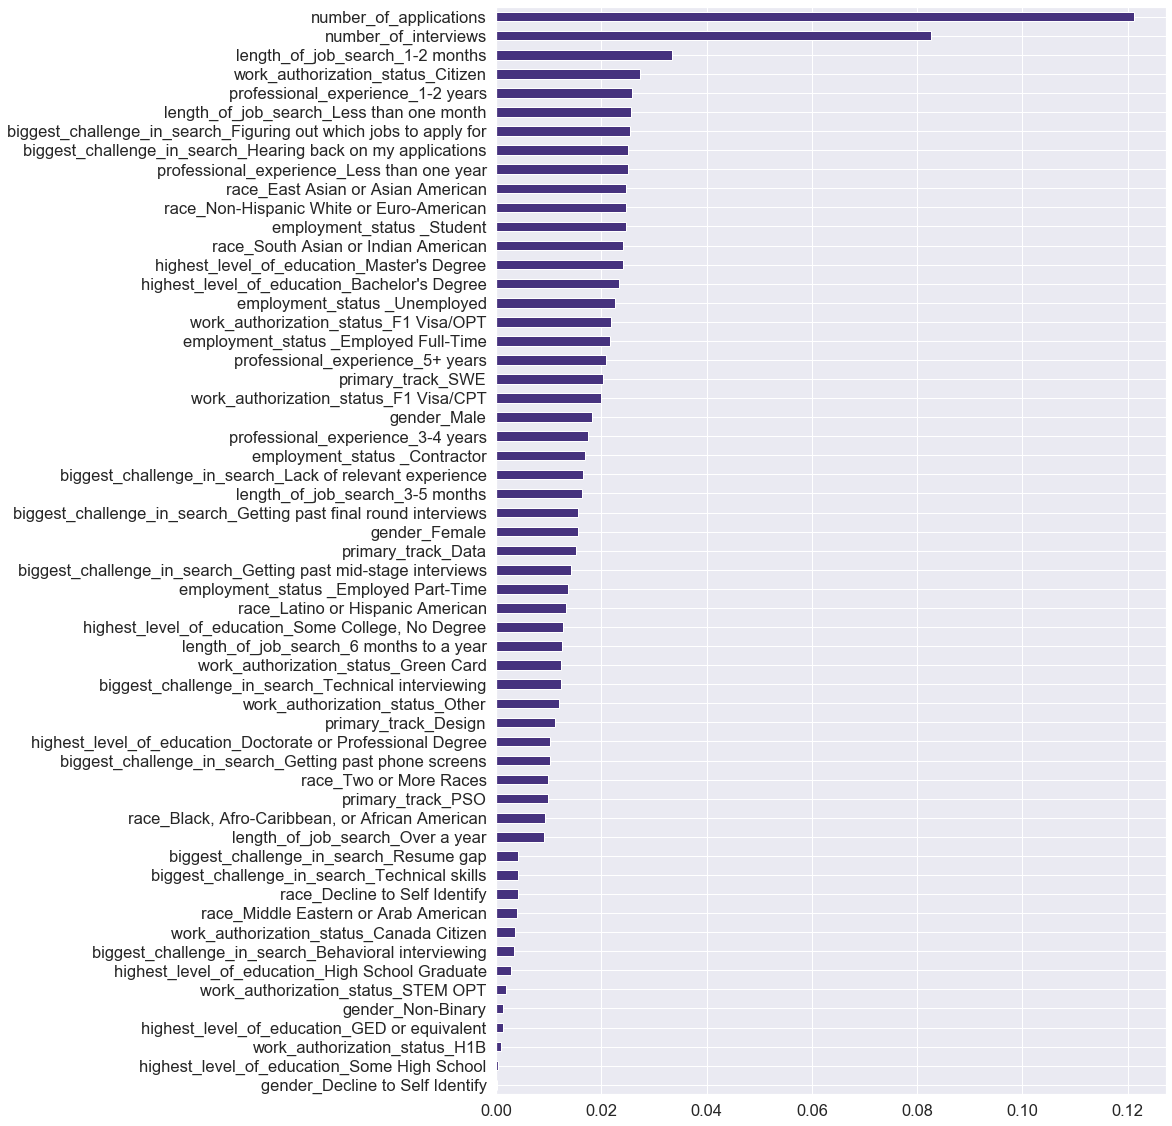

In [254]:
feature_imp.sort_values().plot.barh(figsize = (12,20))
plt.show()

In [301]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)


-0.01666752806348093

In [306]:
pred_r=reg.predict(X_test)

In [309]:
reg_mse = mean_squared_error(y_test, pred_r)
reg_rmse = np.sqrt(reg_mse)
reg_rmse

105.18517102322399

In [320]:
import statsmodels.api as sm

import statsmodels.formula.api as smf

results = sm.OLS(y_train, X_train).fit()

print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     program_duration_days   R-squared:                       0.091
Model:                               OLS   Adj. R-squared:                 -0.030
Method:                    Least Squares   F-statistic:                    0.7521
Date:                   Wed, 08 Jul 2020   Prob (F-statistic):              0.883
Time:                           17:33:19   Log-Likelihood:                -2406.1
No. Observations:                    400   AIC:                             4908.
Df Residuals:                        352   BIC:                             5100.
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

# Conclusion and suggestions
Overall, the placement rate of Pathrise is about 50.7%. The placement rate of fellows with bachelor's degree or higher is better than lower degrees. As for different tracks, the performance of SWE, design and data track is better than other tracks, especially for SWE track. In this case, I suggest we should focus on candidates with bachelor's degree or higher in the addmission process. We should admit more candidates on SWE, design and data track, which seem more profitable. PSO track has more fellows than design and data track, but less placement. I suggest to put more efforts on improving PSO track training or cut this track to save our cost. For the fellows who were ultimately placed, number of application plays an important role on the duration. So it will be helpful to encourage fellows to submit more applications during the training.